<a href="https://colab.research.google.com/github/Wolf-of-github/Computer-Vision/blob/main/Local_Binary_Pattern_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_object = zipfile.ZipFile(file = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

Pre-procssing images

In [5]:
import os

def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  faces, ids = [], []

  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces


In [6]:
ids, faces = get_image_data()

In [10]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

**Training the LBPH classifier**

In [11]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [15]:
lbph_face_classifier= cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

Recognizing faces

In [20]:
test_image = '/content/yalefaces/test/subject01.happy.gif'

In [31]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np.shape

(243, 320)

In [32]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(1, 10.516486843653137)

In [33]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output

1

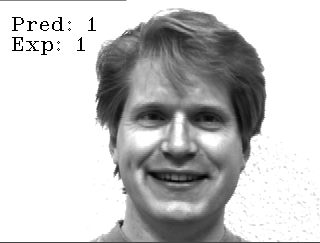

In [34]:
cv2.putText(image_np, 'Pred: '+str(prediction[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255))
cv2.putText(image_np, 'Exp: '+str(expected_output),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255))
cv2_imshow(image_np)